# BladeX

## Tutorial 2: Prepare a blade 2D sectional profile - Transform foils

In this tutorial we present the transformation operations that can be applied to the generated foils. More specifically we show how to rotate, translate, reflect, and scale the foils. Moreover, we show how to deform the camber line and hence deforming the whole foil.

First of all we import from BladeX the `NacaProfile` class for generating the NACA foils that we shall operate on. Moreover we import the `ProfileBase` class which contains the necessary methods for computing all the basic attributes and geometric features of the foil.
Finally we import `numpy` and we set `matplotlib` for the notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from bladex import NacaProfile, ProfileBase

We instantiate the object **naca_0012** of the `NacaProfile` class, which correspond to the NACA-0012 foil. We plot the profile coordinates. In such plot the leading edge would lie at the origin while the trailing edge would be at the point `(1.0, 0.0)`. Now we translate the foil coordinates by a vector `(1.0, 0.0)`, thus we expect the foil to have updated leading edge and trailing edge at points `(1.0, 0.0)` and `(2.0, 0.0)`, respectively.

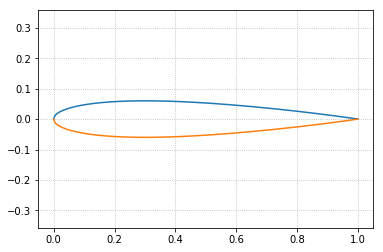

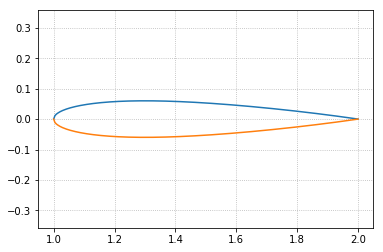

In [2]:
naca_0012 = NacaProfile('0012')
naca_0012.plot()
translation_vector = [1.0, 0.0]
naca_0012.translate(translation=translation_vector)
naca_0012.plot()

Now suppose we want to scale the foil by a factor 2.0. Mathematically this means just multiplying all the coordinates by the scaling factor. However, multiplying the current coordinates would imply not only a foil scaling, but also an undesirable translation of the reference point which, as a consequence, results in translating the leading and trailing edges by a vector `(1.0, 0.0)`. One way to resolve the issue is translating the foil by its reference point to the origin, then performing the scaling and after that performing a back translation to the original position, so that the reference point is kept in its original position, i.e. location `(1.5, 0.0)`.

This procedure is performed automatically while executing the `scale` method.

Chord length before scaling:  1.0


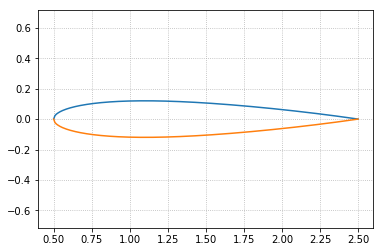

Chord length after scaling:  2.0


In [3]:
print('Chord length before scaling: ', naca_0012.chord_length)
naca_0012.scale(factor=2.0)
naca_0012.plot()
print('Chord length after scaling: ', naca_0012.chord_length)

In order to reflect the foil coordinates about the origin, we execute the `reflect` method.

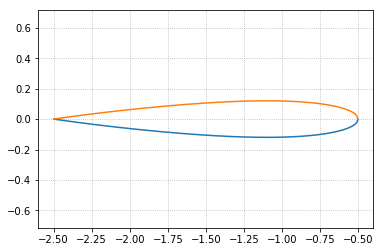

In [4]:
naca_0012.reflect()
naca_0012.plot()

Now suppose we have a cambered foil, e.g. NACA 2412, and we want to deform the foil by manipulating its camber line. This can be achieved through the `deform_camber_line` method, where the camber line is deformed according to the percentage change in its maximum camber.

More specifically, the Y-coordinate of the camber line is rescaled according to the specified percentage change, then the foil coordinates are computed such that the foil thickness would be kept the same. The user can always refer to the code and its documentation for a better understanding.

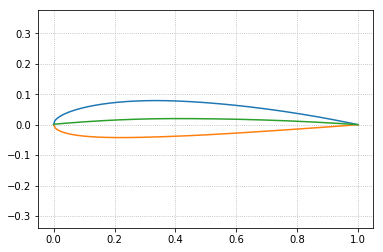

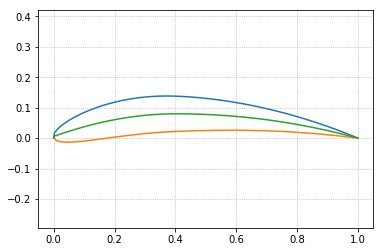

In [5]:
naca_2412 = NacaProfile('2412')
naca_2412.compute_camber_line()
naca_2412.plot(camber_line=True)

naca_2412.deform_camber_line(percent_change=300, n_interpolated_points=None)
naca_2412.plot(camber_line=True)

In order to deform the camber line in the opposite direction, then we specify the percentage change with a negative value. (left as exercise)

In order to rotate the foil, we execute the `rotate` method; and pass the rotation angle either in degrees or in radians (but not both).

We plot the **naca_6904** coordinates while we rotate the foil 360 degrees with a step of 30 degrees.

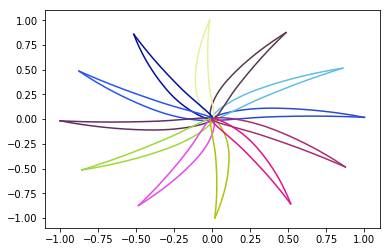

In [6]:
for deg in np.arange(1,360,30):
    naca_6904 = NacaProfile('6409')
    naca_6904.rotate(rad_angle=None, deg_angle=deg)
    random_color = np.random.rand(3,)
    plt.plot(naca_6904.xup_coordinates, naca_6904.yup_coordinates, c=random_color)
    plt.plot(naca_6904.xdown_coordinates, naca_6904.ydown_coordinates, c=random_color)
plt.show()
